<a href="https://colab.research.google.com/github/PatrickRuan/DL-CVMarathon/blob/master/homework/Day004_geometric_transform_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

In [1]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive, output
import numpy as np
import matplotlib.pyplot as plt


drive.mount('/content/drive')
output.clear()
#!mkdir data
!cp -r drive/'My Drive'/教學/發布/23_CV/Data_Day1/ .
!mv Data_Day1 data

In [2]:
import cv2
import time
import numpy as np

img_path = 'data/lena.png'
img = cv2.imread(img_path)

## 上下左右翻轉圖片

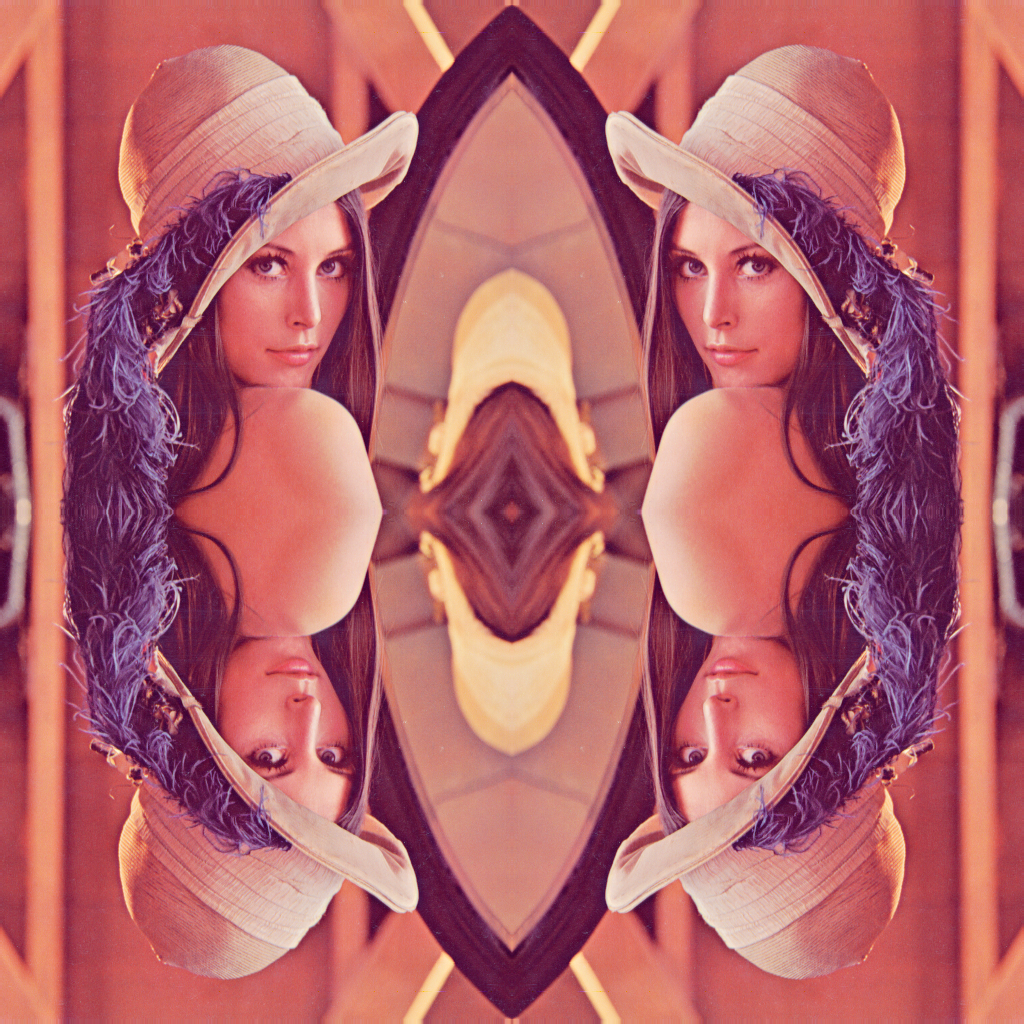

In [10]:
# 水平翻轉 (horizontal)
img_hflip = img[:, ::-1,:]

# 垂直翻轉 (vertical)
img_vflip = img[::-1,:,:]

# 水平 + 垂直翻轉
img_hvflip = img[::-1,::-1,:]

# 組合 + 顯示圖片
hflip = np.hstack((img, img_hflip))
vflip = np.hstack((img_vflip, img_hvflip))
img_flip = np.vstack((hflip, vflip))
cv2_imshow(img_flip)


## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

INTER_NEAREST zoom cost 0.0012116432189941406
INTER_CUBIC zoom cost 0.0026814937591552734
INTER_LANCZOS4 zoom cost 0.012937784194946289
INTER_AREA zoom cost 0.0013022422790527344
INTER_LINEAR zoom cost 0.001238107681274414


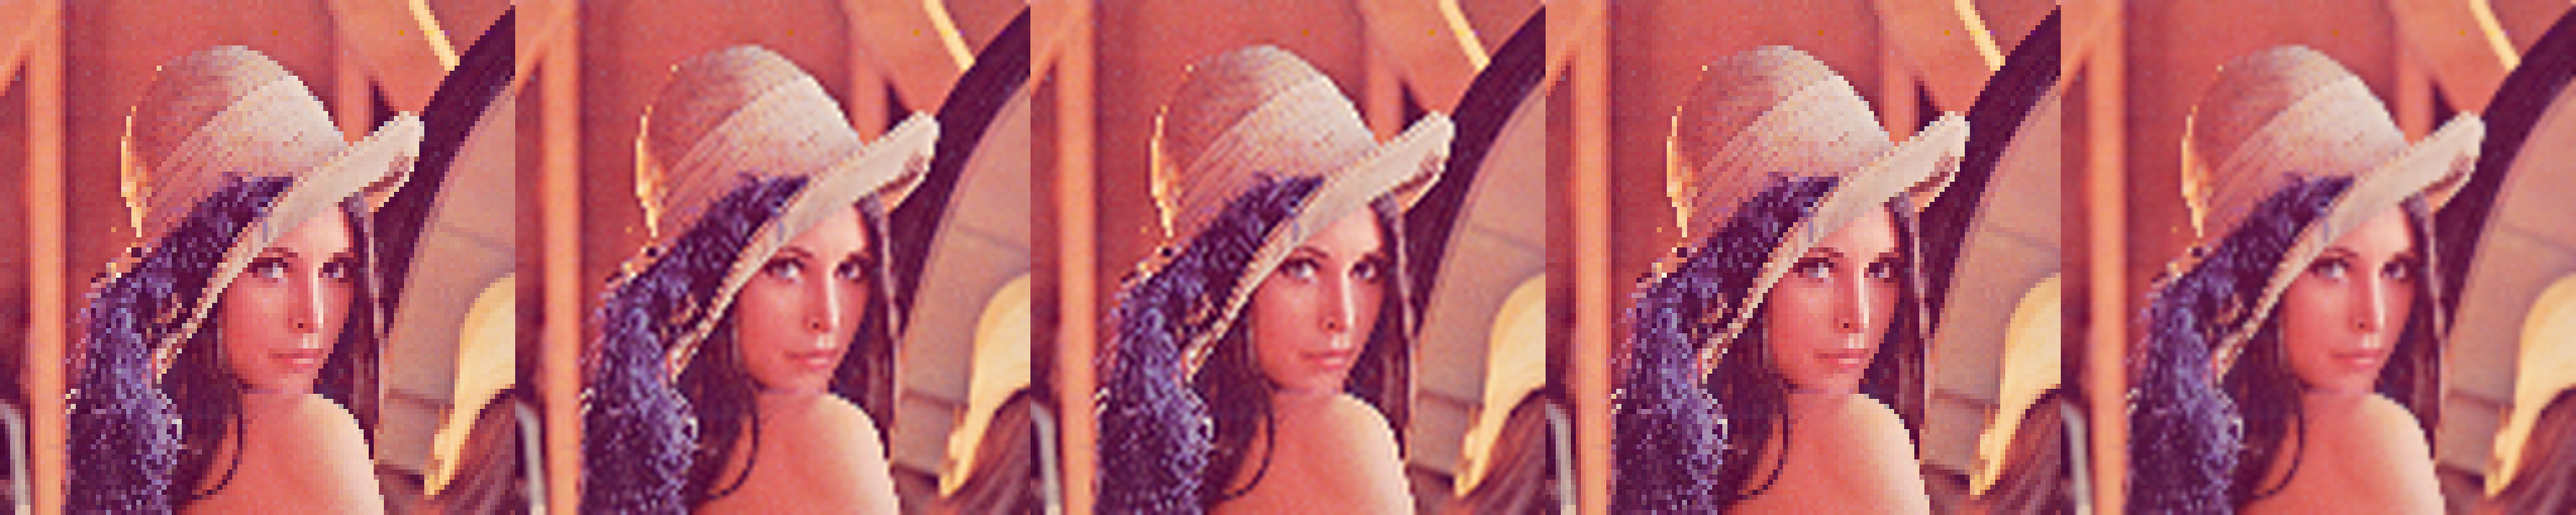

'\ncv2.INTER_NEAREST: 最鄰近插點法\ncv2.INTER_LINEAR: 雙線性插補(預設)\ncv2.INTER_AREA: 臨域像素再取樣插補\ncv2.INTER_CUBIC: 雙立方插補，4×4大小的補點\ncv2.INTER_LANCZOS4: Lanczos插補，8×8大小的補點\n'

In [7]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_nearest_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_cubic_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
print('INTER_CUBIC zoom cost {}'.format(time.time() - start_time))

# Lanczos插補，8×8大小的補點 scale + 計算花費時間
start_time = time.time()
img_lanczos4_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_LANCZOS4)
print('INTER_LANCZOS4 zoom cost {}'.format(time.time() - start_time))

# cv2.INTER_AREA: 臨域像素再取樣插補 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_AREA)
print('INTER_AREA zoom cost {}'.format(time.time() - start_time))


# cv2.INTER_LINEAR: 雙線性插補(預設) scale + 計算花費時間
start_time = time.time()
img_linear_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
print('INTER_LINEAR zoom cost {}'.format(time.time() - start_time))





# 組合 + 顯示圖片
img_zoom = np.hstack((img_nearest_scale, img_cubic_scale, img_lanczos4_scale, img_area_scale, img_linear_scale))

cv2_imshow(img_zoom)

'''
cv2.INTER_NEAREST: 最鄰近插點法
cv2.INTER_LINEAR: 雙線性插補(預設)
cv2.INTER_AREA: 臨域像素再取樣插補
cv2.INTER_CUBIC: 雙立方插補，4×4大小的補點
cv2.INTER_LANCZOS4: Lanczos插補，8×8大小的補點
'''

## 平移幾何轉換

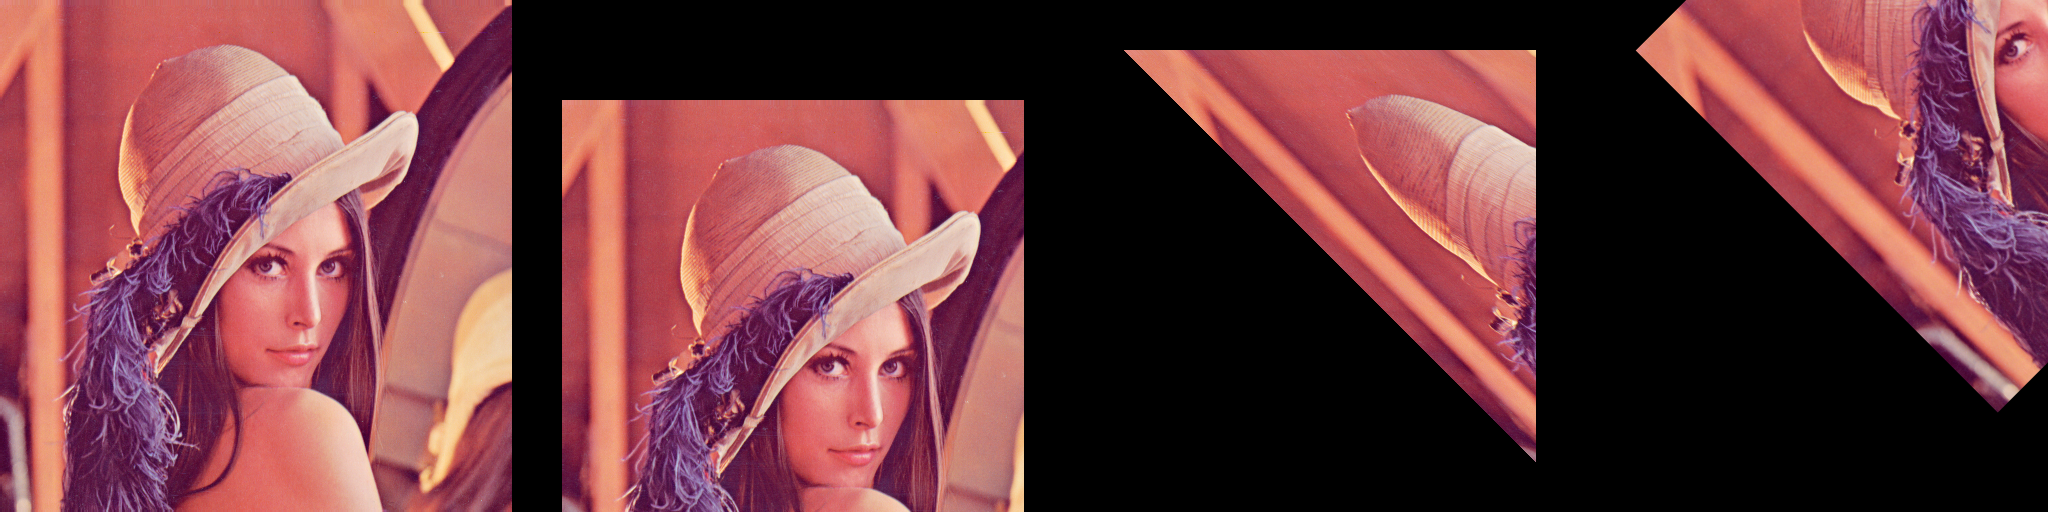

In [24]:
# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel

M = np.array([[1,0,50],[0,1,100]], dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
img_shift = np.hstack((img, shift_img))


# 設定 translation transformation matrix
# x 平移 100 pixel; y 平移 50 pixel
M = np.array([[1, 1, 100],
              [0, 1, 50]], dtype=np.float32)
trans_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# rotation
x = np.sin(0.25*np.pi)
y = np.cos(0.25*np.pi)
M = np.array([[y, x, 100],
              [-x, y, 50]], dtype=np.float32)
rotation_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))





# 組合 + 顯示圖片
img_shift = np.hstack((img, shift_img, trans_img, rotation_img))

cv2_imshow(img_shift)



